In [1046]:
import pandas as pd
import numpy as np

In [1047]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1048]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    RandomizedSearchCV,
    train_test_split
)

In [1049]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
)

In [1050]:
data_credit = pd.read_csv('credit_train.csv')

In [1051]:
data_credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [1052]:
data_credit = data_credit.drop(['Credit Score', 'Maximum Open Credit'], axis=1)

In [1053]:
data_credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,0.0,0.0


In [1054]:
data_credit.shape

(100514, 17)

In [1055]:
data_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Bankruptcies,99796.0,1.177402e-01,3.514238e-01,0.0,0.0000,0.0,0.000000e+00,7.000000e+00
Tax Liens,99990.0,2.931293e-02,2.581824e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01


In [1056]:
data_credit.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [1057]:
data_credit.tail(515)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,935180.0,NaN,Own Home,Debt Consolidation,9118.1,13.0,NaN,4.0,1.0,45600.0,1.0,0.0
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1058]:
data_credit = data_credit.iloc[:100000]

In [1059]:
data_credit.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,0.0,0.0
99999,c63916c6-6d46-47a9-949a-51d09af4414f,1b3014be-5c07-4d41-abe7-44573c375886,Fully Paid,99999999.0,Short Term,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,1.0,0.0


In [1060]:
data_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Bankruptcies,99796.0,1.177402e-01,3.514238e-01,0.0,0.0000,0.0,0.000000e+00,7.000000e+00
Tax Liens,99990.0,2.931293e-02,2.581824e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01


In [1061]:
data_credit.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [1062]:
data_credit.describe(include=["object"]).T

,count,unique,top,freq
Loan ID,100000,81999,14dd8831-6af5-400b-83ec-68e61888a048,2
Customer ID,100000,81999,981165ec-3274-42f5-a3b4-d104041a9ca9,2
Loan Status,100000,2,Fully Paid,77361
Term,100000,2,Short Term,72208
Years in current job,95778,11,10+ years,31121
Home Ownership,100000,4,Home Mortgage,48410
Purpose,100000,16,Debt Consolidation,78552


In [1063]:
data_credit = data_credit.rename(columns={'Loan ID':'Loan_ID',
                                         'Customer ID':'Customer_ID',
                                         'Loan Status':'Loan_Status',
                                         'Current Loan Amount':'Current_Loan_Amount',
                                         'Annual Income':'Annual_Income',
                                         'Years in current job':'Years_in_current_job',
                                         'Home Ownership':'Home_Ownership',
                                         'Monthly Debt':'Monthly_Debt',
                                         'Years of Credit History':'Years_of_Credit_History',
                                         'Months since last delinquent':'Months_since_last_delinquent',
                                         'Number of Open Accounts':'Number_of_Open_Accounts',
                                         'Number of Credit Problems':'Number_of_Credit_Problems',
                                         'Current Credit Balance':'Current_Credit_Balance',
                                         'Tax Liens':'Tax_Liens'})

In [1064]:
data_credit.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,0.0,0.0


In [1065]:
data_credit = data_credit.fillna({'Annual_Income':data_credit.Annual_Income.median(),
                                  'Years_in_current_job':'10+ years',
                                 'Months_since_last_delinquent':data_credit.Months_since_last_delinquent.median(),
                                 'Bankruptcies':data_credit.Bankruptcies.median(),
                                 'Tax_Liens':data_credit.Tax_Liens.median()})

In [1066]:
data_credit.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Loan_Status                     0
Current_Loan_Amount             0
Term                            0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Bankruptcies                    0
Tax_Liens                       0
dtype: int64

In [1067]:
data_credit.shape

(100000, 17)

In [1068]:
sus = ['Current_Loan_Amount', 'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History', 'Months_since_last_delinquent',
        'Number_of_Open_Accounts', 'Number_of_Credit_Problems', 'Current_Credit_Balance', 'Bankruptcies', 'Tax_Liens']

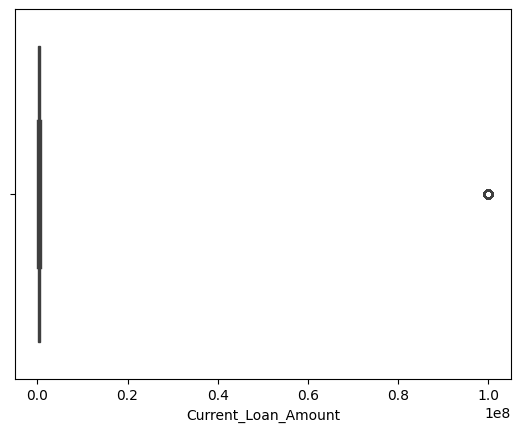

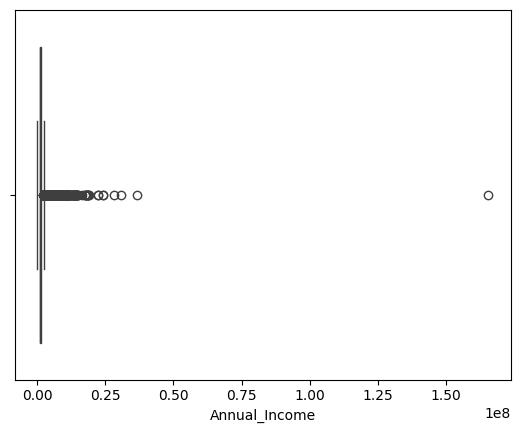

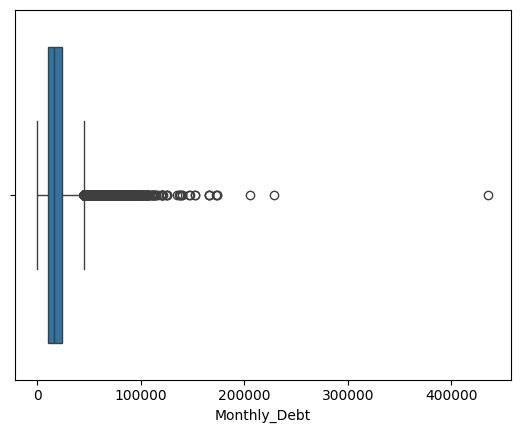

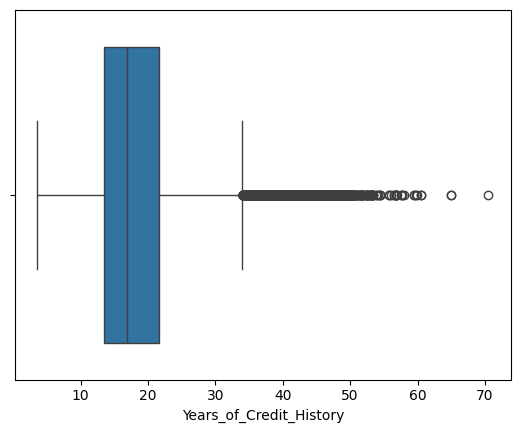

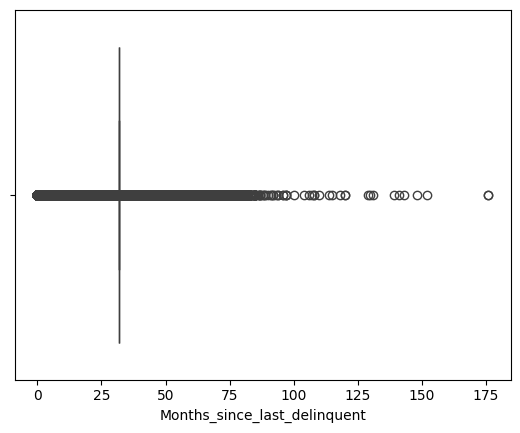

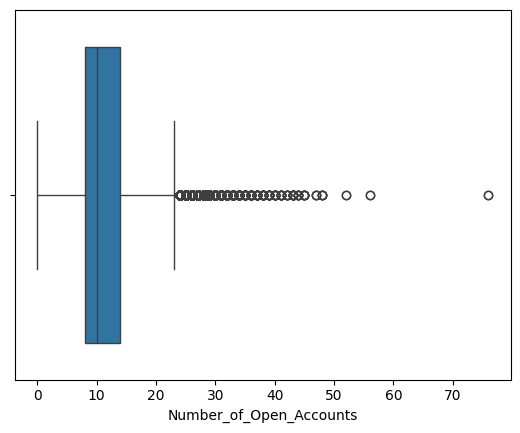

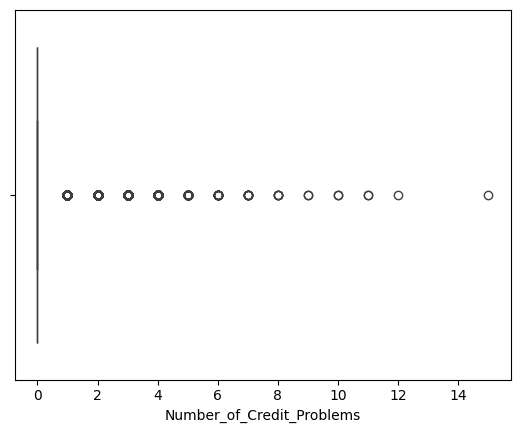

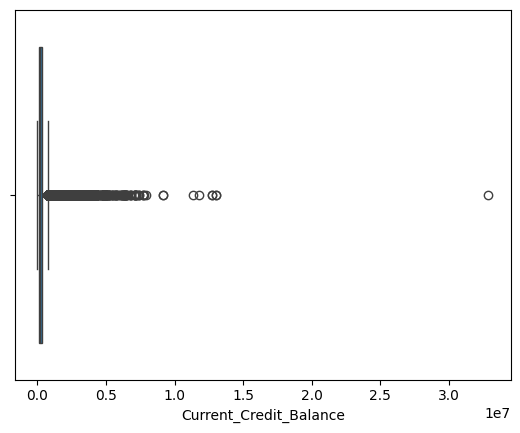

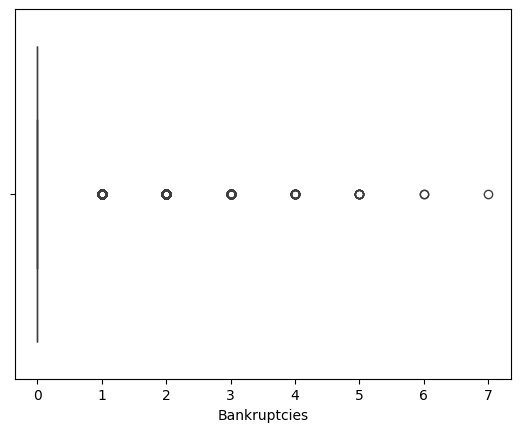

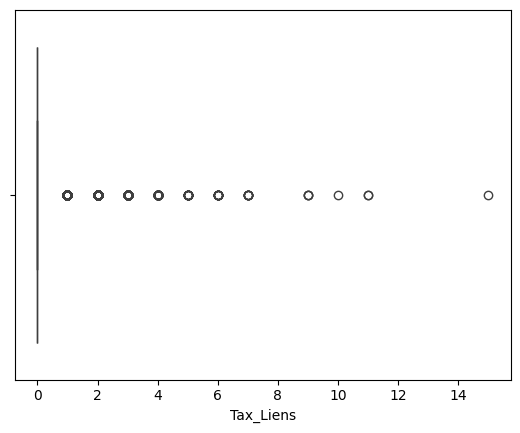

In [1069]:
for i in sus:
    plt.figure()
    sns.boxplot(x=data_credit[i])

In [1070]:
data_credit.query('Number_of_Open_Accounts==0')

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
19329,fa6217cb-0fce-4250-b151-24b0e87ceec5,2db8b14a-ab5d-40aa-98fc-ccdce71c4230,Charged Off,547316.0,Long Term,1174162.0,7 years,Own Home,Debt Consolidation,0.00,14.6,32.0,0.0,0.0,0.0,0.0,0.0
77563,533853f7-1e73-4234-8d2d-4080a335638d,3fbfa439-fc19-408c-9580-ffcbb50f4683,Charged Off,87054.0,Short Term,1174162.0,1 year,Rent,Debt Consolidation,1344.82,12.3,49.0,0.0,0.0,0.0,0.0,0.0


In [1071]:
for i in list(data_credit.select_dtypes('object').columns):
    print(data_credit[i].unique())

['14dd8831-6af5-400b-83ec-68e61888a048'
 '4771cc26-131a-45db-b5aa-537ea4ba5342'
 '4eed4e6a-aa2f-4c91-8651-ce984ee8fb26' ...
 'e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7'
 '81ab928b-d1a5-4523-9a3c-271ebb01b4fb'
 'c63916c6-6d46-47a9-949a-51d09af4414f']
['981165ec-3274-42f5-a3b4-d104041a9ca9'
 '2de017a3-2e01-49cb-a581-08169e83be29'
 '5efb2b2b-bf11-4dfd-a572-3761a2694725' ...
 '2ced5f10-bd60-4a11-9134-cadce4e7b0a3'
 '3e45ffda-99fd-4cfc-b8b8-446f4a505f36'
 '1b3014be-5c07-4d41-abe7-44573c375886']
['Fully Paid' 'Charged Off']
['Short Term' 'Long Term']
['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' '6 years']
['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


In [1072]:
data_credit = data_credit.query('Purpose!="renewable_energy"')

In [1073]:
data_credit.shape

(99990, 17)

In [1074]:
data_credit.Home_Ownership.unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [1075]:
data_credit = data_credit.replace('HaveMortgage', 'Home Mortgage')

In [1076]:
data_credit.shape

(99990, 17)

In [1077]:
data_credit.Home_Ownership.unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [1078]:
data_credit.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,0.0


In [1079]:
debt = 200000
history = 60
number_accounts = 20
problems = 10
balance = 3 * (10)**7
bankruptcies = 6

In [1080]:
data_credit = data_credit.query('(Monthly_Debt < 200000) & (Years_of_Credit_History < 60) &\
(Number_of_Open_Accounts < 20) & (Number_of_Credit_Problems < 10) & (Current_Credit_Balance < (3 * (10)**7)) & (Bankruptcies<6)')

In [1081]:
data_credit.shape

(93659, 17)

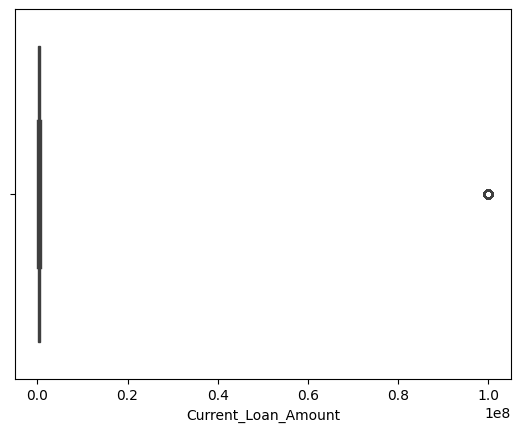

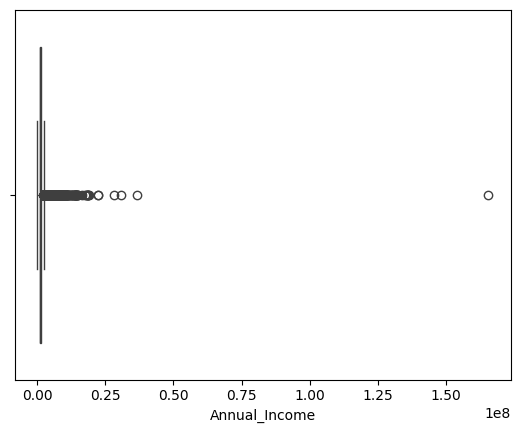

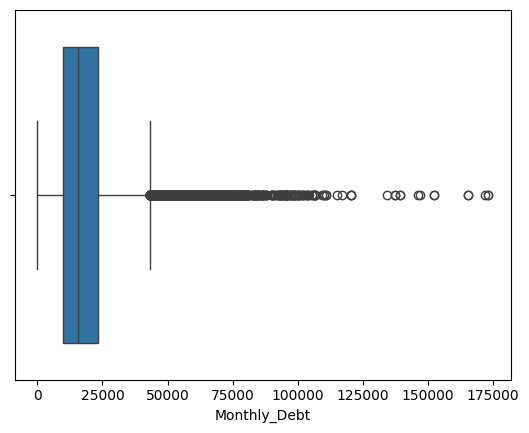

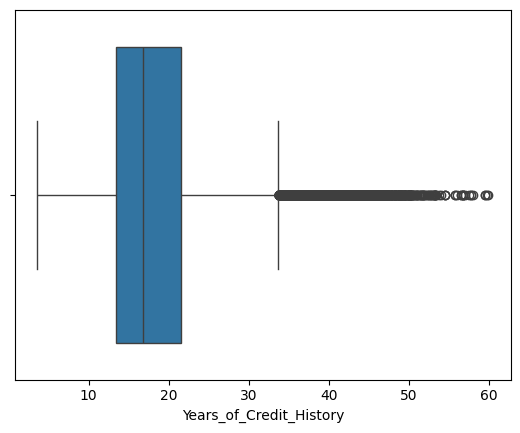

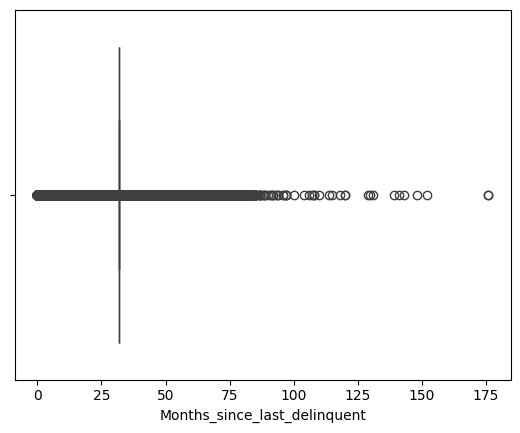

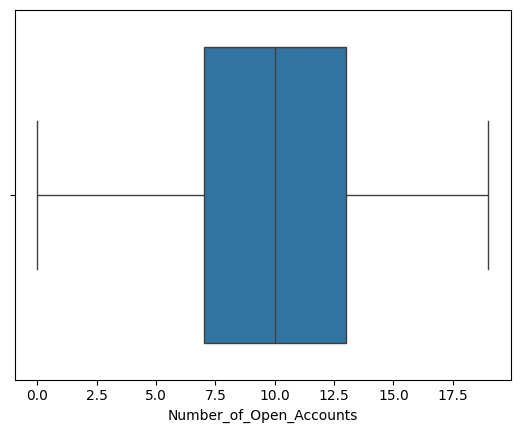

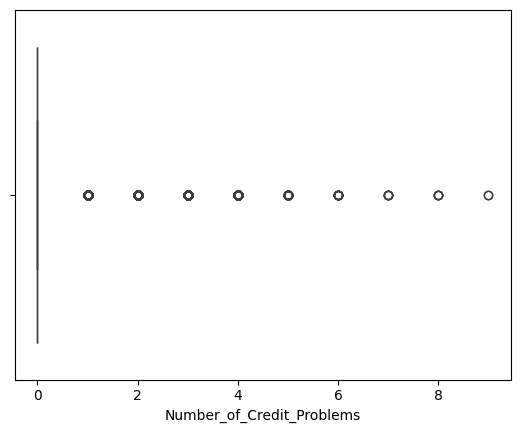

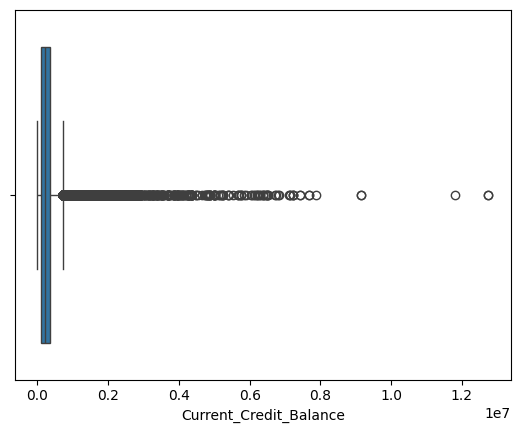

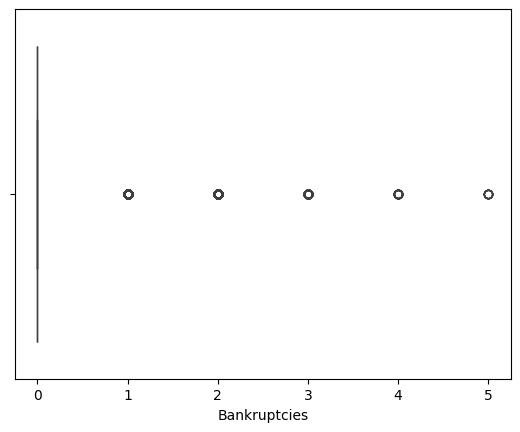

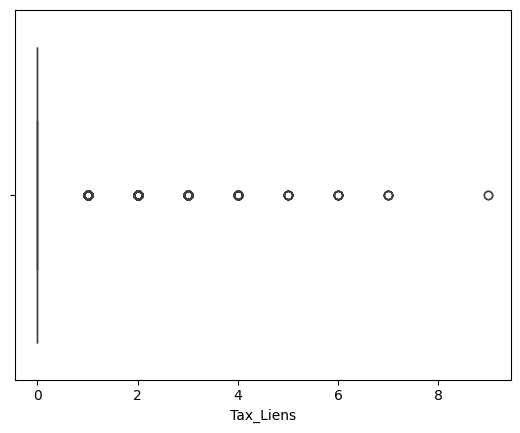

In [1082]:
for i in sus:
    plt.figure()
    sns.boxplot(x=data_credit[i])

In [1083]:
3*10**7

30000000

In [1084]:
data_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Current_Loan_Amount,93659.0,1.175163e+07,3.177911e+07,10802.0,178156.000,305800.00,518760.00,1.000000e+08
Annual_Income,93659.0,1.321376e+06,9.645743e+05,76627.0,919163.000,1174162.00,1493495.00,1.655574e+08
Monthly_Debt,93659.0,1.781811e+04,1.151238e+04,0.0,9897.765,15727.25,23242.70,1.732656e+05
Years_of_Credit_History,93659.0,1.807528e+01,6.957556e+00,3.6,13.400,16.80,21.55,5.990000e+01
Months_since_last_delinquent,93659.0,3.337754e+01,1.508006e+01,0.0,32.000,32.00,32.00,1.760000e+02
Number_of_Open_Accounts,93659.0,1.029806e+01,3.839805e+00,0.0,7.000,10.00,13.00,1.900000e+01
Number_of_Credit_Problems,93659.0,1.697861e-01,4.757465e-01,0.0,0.000,0.00,0.00,9.000000e+00
Current_Credit_Balance,93659.0,2.827219e+05,3.424769e+05,0.0,109288.000,202445.00,353400.00,1.274640e+07
Bankruptcies,93659.0,1.197109e-01,3.525032e-01,0.0,0.000,0.00,0.00,5.000000e+00
Tax_Liens,93659.0,2.860376e-02,2.432626e-01,0.0,0.000,0.00,0.00,9.000000e+00


In [1085]:
data_credit.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,0.0


In [1086]:
data_credit = data_credit.replace('Fully Paid',1)

In [1087]:
data_credit = data_credit.replace('Charged Off',0)

/var/folders/h9/0t6p7wc551g43wlbsc0zxk0r0000gn/T/ipykernel_14617/455318344.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_credit = data_credit.replace('Charged Off',0)


In [1088]:
data_credit.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602.0,Short Term,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,0.0


In [1089]:
data_credit = data_credit.assign(filtr=lambda x: x['Annual_Income']/x['Current_Loan_Amount'])

In [1090]:
data_credit.shape

(93659, 18)

In [1091]:
temp = data_credit.query('Current_Loan_Amount==99999999.0 & filtr>0.05')

In [1092]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Status,89.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Current_Loan_Amount,89.0,1.000000e+08,0.000000e+00,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08
Annual_Income,89.0,7.208640e+06,3.280014e+06,5.056090e+06,5.381066e+06,6.090336e+06,7.488280e+06,2.244888e+07
Monthly_Debt,89.0,4.547810e+04,2.878715e+04,3.838000e+02,2.727640e+04,3.947915e+04,5.854375e+04,1.523319e+05
Years_of_Credit_History,89.0,2.200000e+01,7.004220e+00,6.800000e+00,1.680000e+01,2.250000e+01,2.600000e+01,4.740000e+01
Months_since_last_delinquent,89.0,3.134831e+01,1.693510e+01,1.000000e+00,2.300000e+01,3.200000e+01,3.200000e+01,8.100000e+01
Number_of_Open_Accounts,89.0,1.155056e+01,4.199597e+00,4.000000e+00,8.000000e+00,1.100000e+01,1.400000e+01,1.900000e+01
Number_of_Credit_Problems,89.0,4.494382e-02,2.083546e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Current_Credit_Balance,89.0,8.444473e+05,1.110010e+06,0.000000e+00,2.089240e+05,5.230890e+05,9.620080e+05,7.215782e+06
Bankruptcies,89.0,2.247191e-02,1.490522e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [1093]:
temp

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens,filtr
744,798fc913-785a-46dd-a6df-5d5cb62fc726,1a7a407e-f91c-44ea-80ed-f5f4f890a394,1,99999999.0,Short Term,9057984.0,2 years,Home Mortgage,Debt Consolidation,105676.48,23.1,4.0,15.0,0.0,149720.0,0.0,0.0,0.090580
4109,100c25e6-ede5-406e-9901-3259001dbb7f,d61a7979-a53d-47e1-a429-2ba8bace4483,1,99999999.0,Short Term,6031360.0,10+ years,Home Mortgage,Debt Consolidation,74386.90,27.0,50.0,19.0,0.0,663784.0,0.0,0.0,0.060314
4840,f703f91f-74e8-45b7-a4c5-2f77061bb08f,3efaefea-e934-4e77-bb02-bfbe4c8033cb,1,99999999.0,Short Term,5820270.0,10+ years,Home Mortgage,Medical Bills,20371.04,19.2,66.0,18.0,0.0,523089.0,0.0,0.0,0.058203
4860,1f72f248-b7c3-423d-86cb-2b872f290b27,d536a586-62f6-4a42-93c0-1ac525e96bee,1,99999999.0,Short Term,6239866.0,4 years,Rent,Debt Consolidation,29223.52,14.1,32.0,11.0,0.0,551836.0,0.0,0.0,0.062399
5414,ad0ccfc2-d789-4ccd-8336-93b446a641e5,016aa034-1169-4cf4-bad2-89ef83b1281a,1,99999999.0,Long Term,6596135.0,< 1 year,Home Mortgage,Home Improvements,52329.42,15.9,25.0,18.0,0.0,156788.0,0.0,0.0,0.065961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95774,63c6b217-d463-40c7-b66f-00674cd324fa,9343115d-aabb-4a97-bd7a-855757b12916,1,99999999.0,Short Term,5997920.0,2 years,Rent,Debt Consolidation,39686.25,17.6,46.0,11.0,0.0,350151.0,0.0,0.0,0.059979
97468,7a6c1fdf-50aa-44fc-a98b-742e18b02411,4e3d7ecc-e464-4512-8660-06024f6c6c36,1,99999999.0,Short Term,5077294.0,10+ years,Home Mortgage,Debt Consolidation,37487.38,32.5,10.0,11.0,0.0,834024.0,0.0,0.0,0.050773
97557,ded81137-4bc2-4350-a396-72342b086830,2380a5fe-fda7-45ca-8640-e19c8cf2f6af,1,99999999.0,Long Term,7650160.0,10+ years,Home Mortgage,Debt Consolidation,34362.07,29.0,77.0,10.0,0.0,638951.0,0.0,0.0,0.076502
97964,5885e2c6-e7b3-4bd5-9c0b-237036122de9,38dba8ca-f87b-4c49-8999-bdb741960228,1,99999999.0,Short Term,11463840.0,3 years,Rent,Debt Consolidation,39454.64,22.9,32.0,8.0,0.0,428222.0,0.0,0.0,0.114638


In [1094]:
data_credit.query('Current_Loan_Amount==99999999.0 & filtr<0.05')

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens,filtr
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0,0.022319
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,1,99999999.0,Short Term,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,0.0,0.0,0.007146
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,1,99999999.0,Short Term,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,0.0,0.0,0.007762
13,01d878ae-efa2-41e2-8159-6c834ff09f47,900c9191-2c20-4688-af7e-07c59b5d5a24,1,99999999.0,Short Term,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,32.0,10.0,1.0,225549.0,1.0,0.0,0.015609
26,0c14cb77-29a3-4964-9198-0c43f5f982b0,9baf6d5d-f744-4332-abb0-e939b75cde40,1,99999999.0,Short Term,1029857.0,1 year,Rent,Debt Consolidation,13817.18,12.0,32.0,6.0,0.0,138339.0,0.0,0.0,0.010299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99955,7a863e10-f7b3-4674-afd6-832e06aa1e10,9016d95c-cf74-475e-9c39-c3fc97c8a164,1,99999999.0,Long Term,1111918.0,5 years,Own Home,Debt Consolidation,20755.79,29.5,32.0,18.0,0.0,302290.0,0.0,0.0,0.011119
99970,1972ab02-51f9-4bc0-bb24-095740d2d18c,5b939de4-e3fa-4163-9fdc-64c0cc1aa77b,1,99999999.0,Short Term,1058376.0,< 1 year,Home Mortgage,Other,11554.09,10.1,20.0,12.0,0.0,14098.0,0.0,0.0,0.010584
99971,fa1a1ef5-3697-469c-a842-538b8dcfb63a,567c8737-56d2-4aa8-b6a2-c55182f28518,1,99999999.0,Long Term,1530564.0,8 years,Rent,Medical Bills,13264.85,28.0,3.0,10.0,0.0,111283.0,0.0,0.0,0.015306
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,1,99999999.0,Short Term,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,0.0,0.0,0.011900


In [1095]:
5*10**6

5000000

In [1096]:
data_credit.shape

(93659, 18)

In [1097]:
# query = 'Current_Loan_Amount==99999999.0 & filtr<0.05'

In [1098]:
# data_credit = data_credit.query('~(Current_Loan_Amount==99999999.0 & filtr<0.05)')

In [1099]:
# data_credit.shape

In [1100]:
# data_credit.query('Current_Loan_Amount==99999999.0 & filtr>0.05')

In [1101]:
data_credit.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens,filtr
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,0.0,2.621153
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0,0.022319
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,0.0,2.321047
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,0.0,6.663046
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602.0,Short Term,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,0.0,4.340989


In [1102]:
data_credit.loc[(data_credit['Annual_Income'] / data_credit['Current_Loan_Amount']) < 0.05, 'Loan_Status'] = 0

In [1103]:
data_credit.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens,filtr
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,0.0,2.621153
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0,0.022319
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,0.0,2.321047
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,Short Term,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,0.0,6.663046
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,0,206602.0,Short Term,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,0.0,4.340989


In [1104]:
data_credit.shape

(93659, 18)

In [1105]:
data_credit.query('filtr<0.05')

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens,filtr
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0,0.022319
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,0,99999999.0,Short Term,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,0.0,0.0,0.007146
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,0,99999999.0,Short Term,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,0.0,0.0,0.007762
13,01d878ae-efa2-41e2-8159-6c834ff09f47,900c9191-2c20-4688-af7e-07c59b5d5a24,0,99999999.0,Short Term,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,32.0,10.0,1.0,225549.0,1.0,0.0,0.015609
26,0c14cb77-29a3-4964-9198-0c43f5f982b0,9baf6d5d-f744-4332-abb0-e939b75cde40,0,99999999.0,Short Term,1029857.0,1 year,Rent,Debt Consolidation,13817.18,12.0,32.0,6.0,0.0,138339.0,0.0,0.0,0.010299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99955,7a863e10-f7b3-4674-afd6-832e06aa1e10,9016d95c-cf74-475e-9c39-c3fc97c8a164,0,99999999.0,Long Term,1111918.0,5 years,Own Home,Debt Consolidation,20755.79,29.5,32.0,18.0,0.0,302290.0,0.0,0.0,0.011119
99970,1972ab02-51f9-4bc0-bb24-095740d2d18c,5b939de4-e3fa-4163-9fdc-64c0cc1aa77b,0,99999999.0,Short Term,1058376.0,< 1 year,Home Mortgage,Other,11554.09,10.1,20.0,12.0,0.0,14098.0,0.0,0.0,0.010584
99971,fa1a1ef5-3697-469c-a842-538b8dcfb63a,567c8737-56d2-4aa8-b6a2-c55182f28518,0,99999999.0,Long Term,1530564.0,8 years,Rent,Medical Bills,13264.85,28.0,3.0,10.0,0.0,111283.0,0.0,0.0,0.015306
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,0,99999999.0,Short Term,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,0.0,0.0,0.011900


In [1106]:
data_credit = data_credit.drop(['filtr', 'Loan_ID', 'Customer_ID'], axis=1)

In [1107]:
data_credit.shape

(93659, 15)

In [1108]:
data_credit.head()

,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
0,1,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,0.0
2,0,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
3,1,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,0.0
4,1,176220.0,Short Term,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,0.0
5,0,206602.0,Short Term,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,0.0


In [1109]:
data_credit = data_credit.reset_index(drop=True)

In [1110]:
data_credit.head()

,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
0,1,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,0.0
1,0,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
2,1,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,0.0
3,1,176220.0,Short Term,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,0.0
4,0,206602.0,Short Term,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,0.0


In [1111]:
data_credit.head()

,Loan_Status,Current_Loan_Amount,Term,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
0,1,445412.0,Short Term,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,0.0
1,0,99999999.0,Short Term,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0
2,1,347666.0,Long Term,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,0.0
3,1,176220.0,Short Term,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,0.0
4,0,206602.0,Short Term,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,0.0


In [1112]:
data_credit.shape

(93659, 15)

In [1113]:
data_credit = pd.get_dummies(data_credit)

In [1114]:
data_credit.head()

,Loan_Status,Current_Loan_Amount,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,445412.0,1167493.0,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,...,True,False,False,False,False,False,False,False,False,False
1,0,99999999.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1,347666.0,806949.0,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1,176220.0,1174162.0,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0,206602.0,896857.0,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [1115]:
data_credit = data_credit.replace(True, 1)

In [1116]:
data_credit = data_credit.replace(False, 0)

/var/folders/h9/0t6p7wc551g43wlbsc0zxk0r0000gn/T/ipykernel_14617/1531422118.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_credit = data_credit.replace(False, 0)


In [1117]:
data_credit.shape

(93659, 42)

In [1118]:
data_credit.head()

,Loan_Status,Current_Loan_Amount,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,1,445412.0,1167493.0,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0,99999999.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,347666.0,806949.0,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,176220.0,1174162.0,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,206602.0,896857.0,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [1119]:
X = data_credit.drop('Loan_Status', axis=1)

In [1120]:
X.head()

,Current_Loan_Amount,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,1167493.0,5214.74,17.2,32.0,6.0,1.0,228190.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,99999999.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,347666.0,806949.0,8741.90,12.0,32.0,9.0,0.0,256329.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,176220.0,1174162.0,20639.70,6.1,32.0,15.0,0.0,253460.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,206602.0,896857.0,16367.74,17.3,32.0,6.0,0.0,215308.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [1121]:
y = data_credit.Loan_Status

In [1122]:
y

0        1
1        0
2        1
3        1
4        0
        ..
93654    1
93655    1
93656    1
93657    1
93658    0
Name: Loan_Status, Length: 93659, dtype: int64

In [1123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1124]:
clf_rf = RandomForestClassifier(random_state=0)

In [1125]:
parameters = {'n_estimators': range(10,150,10),
             'max_depth': range(1,25,2),
             'min_samples_leaf': range(1,8),
             'min_samples_split': range(2,10,2)}

In [1126]:
clf = RandomizedSearchCV(clf_rf, parameters, cv=5)

In [1127]:
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'max_depth': range(1, 25, 2),
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 10, 2),
                                        'n_estimators': range(10, 150, 10)})

In [1128]:
y_pred = clf.predict(X_test)

In [1129]:
accuracy_score(y_test, y_pred)

0.7711919244208619

In [1130]:
f1_score(y_test, y_pred)

0.8515906992361286

In [1131]:
best_clf = clf.best_estimator_

In [1132]:
best_clf.feature_importances_

array([6.97158524e-01, 6.22418846e-02, 3.99550542e-02, 3.53412547e-02,
       2.37043368e-02, 2.16096533e-02, 4.65174233e-03, 3.71766084e-02,
       3.11605330e-03, 2.61429160e-03, 8.62159851e-03, 9.63331515e-03,
       2.07705566e-03, 3.73627228e-03, 2.46565189e-03, 2.34691854e-03,
       2.10101107e-03, 2.20017588e-03, 1.95002607e-03, 1.88383714e-03,
       1.98779144e-03, 1.67784758e-03, 2.36889894e-03, 4.88630394e-03,
       2.21076054e-03, 4.73086615e-03, 2.03287404e-03, 7.90008863e-04,
       9.43261873e-04, 3.27035969e-03, 1.55253650e-04, 1.88505245e-03,
       1.26790098e-03, 1.66882594e-03, 5.57215472e-04, 5.16565972e-04,
       4.67931894e-04, 2.26823752e-03, 1.33480405e-03, 2.56594581e-04,
       1.37379292e-04])

<Axes: >

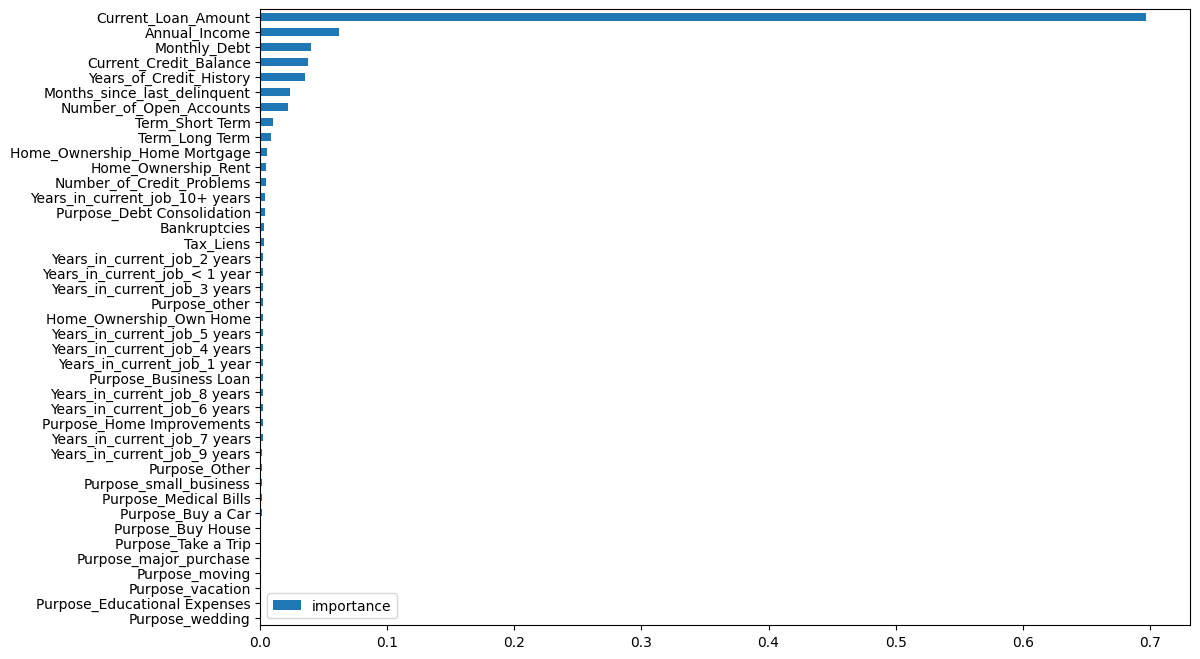

In [1133]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [1134]:
X.columns

Index(['Current_Loan_Amount', 'Annual_Income', 'Monthly_Debt',
       'Years_of_Credit_History', 'Months_since_last_delinquent',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Bankruptcies', 'Tax_Liens', 'Term_Long Term',
       'Term_Short Term', 'Years_in_current_job_1 year',
       'Years_in_current_job_10+ years', 'Years_in_current_job_2 years',
       'Years_in_current_job_3 years', 'Years_in_current_job_4 years',
       'Years_in_current_job_5 years', 'Years_in_current_job_6 years',
       'Years_in_current_job_7 years', 'Years_in_current_job_8 years',
       'Years_in_current_job_9 years', 'Years_in_current_job_< 1 year',
       'Home_Ownership_Home Mortgage', 'Home_Ownership_Own Home',
       'Home_Ownership_Rent', 'Purpose_Business Loan', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Othe

In [1135]:
test = X[0:0]

In [1136]:
test

,Current_Loan_Amount,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding


In [1171]:
data = [500000, 1000000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [1172]:
test.loc[0] = data

/var/folders/h9/0t6p7wc551g43wlbsc0zxk0r0000gn/T/ipykernel_14617/350039984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[0] = data


In [1173]:
test

,Current_Loan_Amount,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,500000,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1174]:
best_clf.predict_proba(test)

array([[0.40405276, 0.59594724]])

In [1176]:
clf.predict(test)

array([1])